In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 5 Deep Learning
This section presents several deep learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

## ~5.1 Artificial Neural Networks

## 5.2 Autoencoder
- Application: An autoencoder is used for dimension reduction, image processing, and anomaly detection
- Description: An autoencoder is a neural network that learns to copy input to output by training a network that ignores noise
- Functionality:
    * An autoencoder has a hidden layer that describes a code used to represent the input and comprises two parts: Encoder mapping the input into the code, decoder mapping the code to a reconstruction of the original input
    * Copying the input perfectly would just duplicate it, therefore autoencoders usually are restricted in ways that force them to reconstruct the input approximately, preserving only the most relevant aspects of the data
    * Anomaly detection use case:
        * We can either train the model on normal instances only, or on a dataset with low frequency of anomalies (since their contribution to the representation learnt by the model can be neglected)
        * The model is encouraged to learn how to reproduce the most requent characteristics of observations
        * When faced with anomalies, the reproduction performance of the model decreases
        * After training, the model will be able to reconstruct normal data very well, while failing to do so with anomaly data
        * In order to detect anomalies, we calculate the reconstruction error (anomaly scores) of a data point, representing the error between the original data point and its reconstruction by the model
- Limitations: An autoencode is not able to identify which information is relevant because it learns to capture as much information as possible rather than as much relevant information as possible

In [3]:
from pyod.utils.data import generate_data
from pyod.models.auto_encoder import AutoEncoder

Using TensorFlow backend.


/Users/juliankleindiek/anaconda3/lib/python3.7/site-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                275       
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

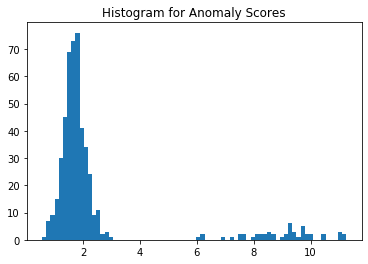

In [4]:
# create data
noise = 0.1
n_train = 500
n_test = 500
n_features = 10
X_train, y_train, X_test, y_test = generate_data(n_train = n_train, n_test = n_test, n_features = n_features, contamination= noise)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# initialize autoencoder (input and output layer has 25 neurons each, there are two hidden layers with each two neurons)
ae = AutoEncoder(hidden_neurons = [25, 2, 2, 25])

# fit autoencoder
ae.fit(X_train)

# find outliers in train data
anomaly_Scores_train = ae.decision_scores_

# apply trained model to predict anomaly score for each observation in test data (high socres relate to low frequence, hence outliers)
anomaly_scores_test = ae.decision_function(X_test)
anomaly_scores_test = pd.Series(anomaly_scores_test)

# plot the result
plt.hist(anomaly_scores_test, bins = 'auto')
plt.title("Histogram for Anomaly Scores")
plt.show()